In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score, confusion_matrix

# 1. Visualizacion de los Datos

In [53]:
# Cargar 
df = pd.read_csv('./Dataset/raw/Telco_Customer.csv')

# Mostrar primeras filas 
print('PRIMERAS TRES FILAS')
print('------------')
print(df.head(3).T)

PRIMERAS TRES FILAS
------------
                                 0             1               2
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK
gender                      Female          Male            Male
SeniorCitizen                    0             0               0
Partner                        Yes            No              No
Dependents                      No            No              No
tenure                           1            34               2
PhoneService                    No           Yes             Yes
MultipleLines     No phone service            No              No
InternetService                DSL           DSL             DSL
OnlineSecurity                  No           Yes             Yes
OnlineBackup                   Yes            No             Yes
DeviceProtection                No           Yes              No
TechSupport                     No            No              No
StreamingTV                     No            No         

In [54]:
# Revisar informacin general del dataset
print('')
print('INFORMACION GENERAL')
print('------------')
print(df.info())


INFORMACION GENERAL
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

In [55]:
# Verificar estadisticas descriptivas para valores fuera de rango
print('')
print('ESTADISTICAS')
print('------------')
print(df.describe())


ESTADISTICAS
------------
       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000


In [56]:
# Comprobar si hay valores nulos
print('')
print('VALORES NULOS')
print('------------')
print(df.isnull().sum())


VALORES NULOS
------------
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [57]:
# Revisar valores unicos de las variables
print('')
print('VALORES UNICOS')
print('------------')
for col in df: # for col in categorical_columns
    print(f'{col}: {df[col].unique()}')


VALORES UNICOS
------------
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed chec

# 2. Tratar los datos

In [58]:
# Crear una nueva columna para indicar si el clinete tiene internet
df['HasInternet'] = df['InternetService'].apply(lambda x: 'Yes' if x != 'No' else 'No')

# Reemplazar 'No internet service' por 'No' en las columnas relacionadas
cols_internet_service = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[cols_internet_service] = df[cols_internet_service].replace({'No internet service': 'No'})

# Crear una columna para indicar si el cliente tiene servicio telefónico
df['HasPhoneService'] = df['PhoneService'].apply(lambda x: 'Yes' if x == 'Yes' else 'No')

# Reemplazar 'No phone service' por 'No' en MultipleLines
df['MultipleLines'] = df['MultipleLines'].replace({'No phone service': 'No'})



# Convertir las columnas categorical de tipo object a category
#categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
#                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
#                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
#                       'PaperlessBilling', 'PaymentMethod', 'Churn','HasInternet','HasPhoneService']

#df[categorical_columns] = df[categorical_columns].astype('category')



# Reemplazar valores vacíos o espacios en blanco por NaN
df['TotalCharges'] = df['TotalCharges'].replace(' ', pd.NA)

# Convertir la columna a tipo numérico (float64)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [59]:
# Comprobar si hay valores nulos
print('')
print('VALORES NULOS')
print('------------')
print(df.isnull().sum())


VALORES NULOS
------------
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
HasInternet          0
HasPhoneService      0
dtype: int64


In [60]:
# Como tiene nulos en 'TotalCharges' vamos a cambiar por la mediana para evitar valores atipicos
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

/tmp/ipykernel_3398/2945866912.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [61]:
# Revison de datos
print('')
print('INFORMACION GENERAL')
print('------------')
print(df.info())


INFORMACION GENERAL
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  Paperles

In [62]:
print('')
print('VALORES UNICOS')
print('------------')
for col in df:
    print(f'{col}: {df[col].unique()}')


VALORES UNICOS
------------
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   10

In [63]:
# Guardar el dataset en un archivo CSV
df.to_csv('./Dataset/processed/Telco_Customer_mod.csv', index=False)

## Solo para visualizacion en el Mapa de Calor

In [64]:
# Lista de columnas que contienen 'Yes'/'No'
columns_yes_no = ['Partner', 'Dependents', 'PhoneService', 'Churn', 'MultipleLines', 
                  'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'HasInternet', 
                  'HasPhoneService']

# Convertir todas las columnas a 0/1
df[columns_yes_no] = df[columns_yes_no].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

# Convertir las columnas categorical de tipo object a category
categorical_columns = ['gender','InternetService', 'Contract', 'PaymentMethod']

df[categorical_columns] = df[categorical_columns].astype('category')

In [65]:
print('')
print('INFORMACION GENERAL')
print('------------')
print(df.info())


INFORMACION GENERAL
------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7043 non-null   object  
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   int64   
 4   Dependents        7043 non-null   int64   
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   int64   
 7   MultipleLines     7043 non-null   int64   
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   int64   
 10  OnlineBackup      7043 non-null   int64   
 11  DeviceProtection  7043 non-null   int64   
 12  TechSupport       7043 non-null   int64   
 13  StreamingTV       7043 non-null   int64   
 14  StreamingMovies   7043 non-null   int64   
 15  Contract          7043 non-null   cate

In [66]:
print('')
print('VALORES UNICOS')
print('------------')
for col in df:
    print(f'{col}: {df[col].unique()}')


VALORES UNICOS
------------
customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female', 'Male']
Categories (2, object): ['Female', 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL', 'Fiber optic', 'No']
Categories (3, object): ['DSL', 'Fiber optic', 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month', 'One year', 'Two year']
Categories (3, object): ['Month-to-month', 'One year', 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']

In [67]:
# Guardar el dataset en un archivo CSV
df.to_csv('./Dataset/processed/Telco_Customer_mod_NUM.csv', index=False)

# 3. Visualizar Datos

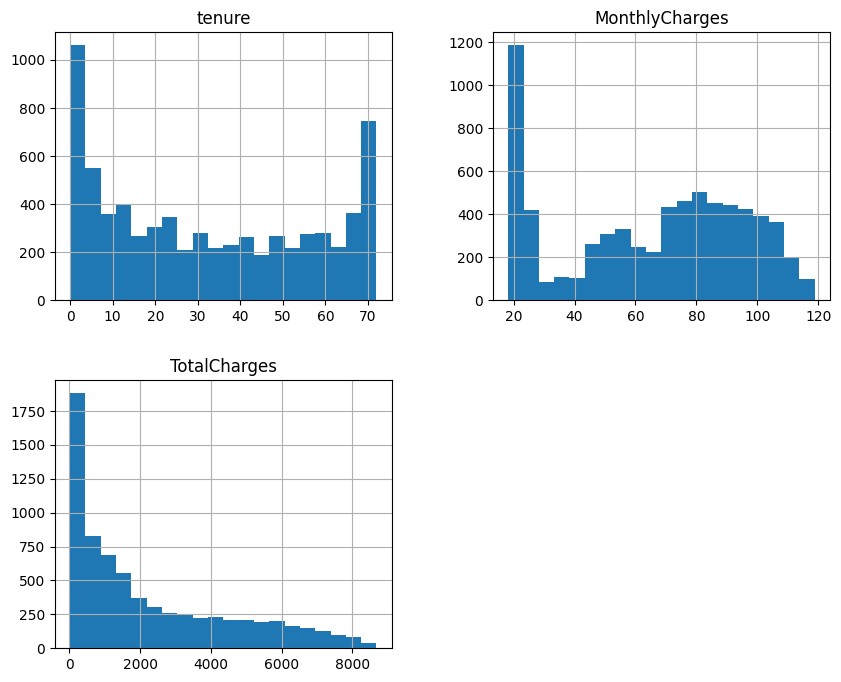

In [68]:
df[['tenure', 'MonthlyCharges', 'TotalCharges']].hist(bins=20, figsize=(10, 8))
plt.show()

Viendo la distribución de la columna tenure (tiempo de permanencia), los valores de 0 indican clientes que acaban de unirse al servicio y no han cumplido un mes. 

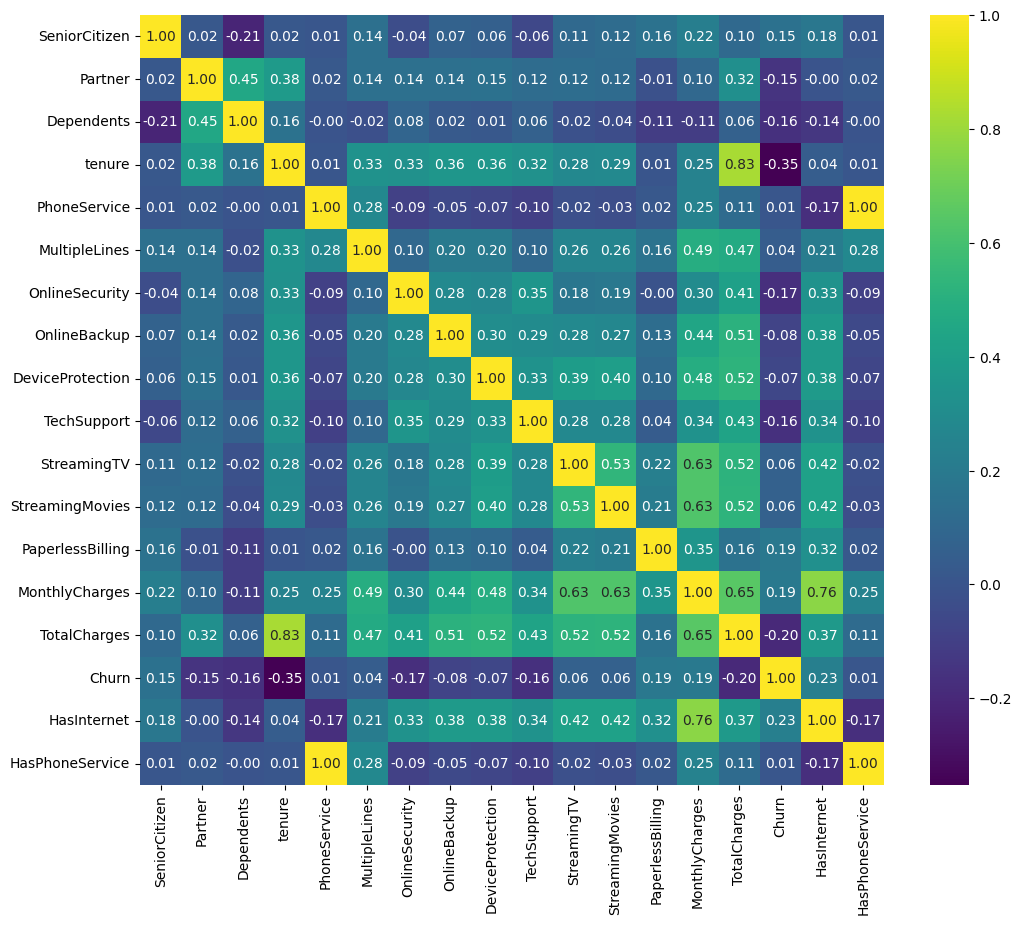

In [69]:
#Filtrar solo las columnas numericas
df_numeric = df.select_dtypes(include=['float64','int64'])

# Aumentar el tamaño de la figura
plt.figure(figsize=(12, 10))

# Mapa de calor para visualizar correlaciones
sns.heatmap(df_numeric.corr(), annot = True, cmap = 'viridis', fmt = '.2f')
plt.show()

Cruce de variables (análisis bivariado):

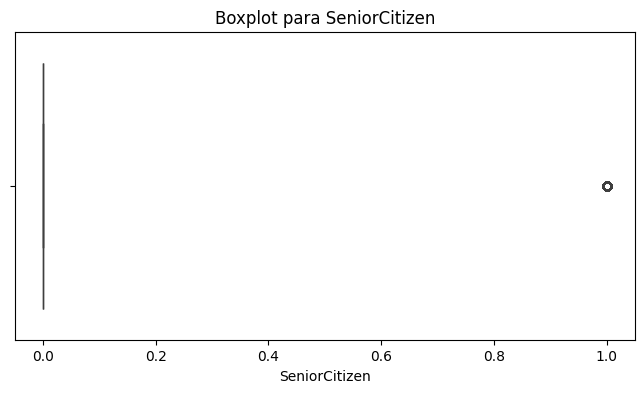

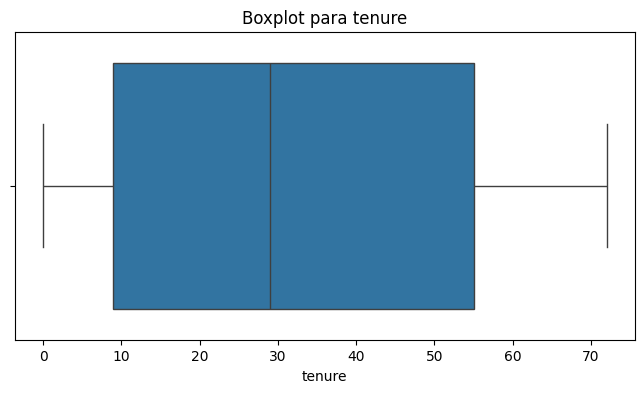

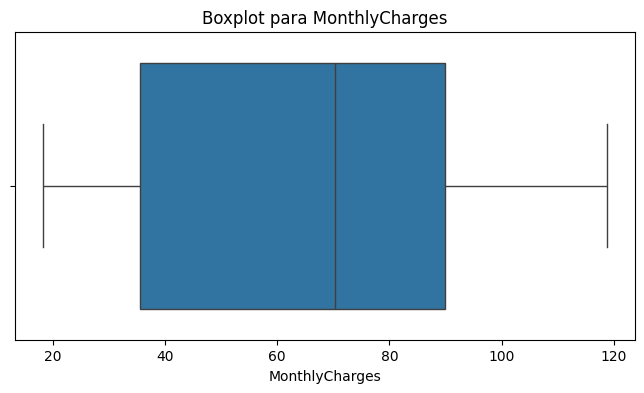

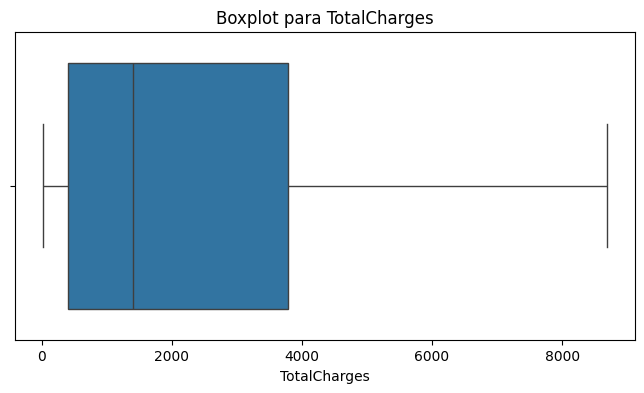

In [70]:
df1 = pd.read_csv('./Dataset/processed/Telco_Customer_mod.csv')

# Seleccionar solo las columnas numericas
numeric_columns = df1.select_dtypes(include = ['float64', 'int64']).columns

#Crear un bloxplot para cada variable numerica
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df1[column])
    plt.title(f'Boxplot para {column}')
    plt.show()

# 4. Tratamiento de variables numericas

### DATASET DE 4_tratar_Data.py

In [71]:
print(df1.describe())

       SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000


In [72]:
categorical_cols1 = df1.select_dtypes(include=['object', 'category']).columns
print(categorical_cols1)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'HasInternet',
       'HasPhoneService'],
      dtype='object')


## Label Encoding:
Este método asigna un número entero a cada categoría. Funciona bien si las variables categóricas tienen un orden o si el número de categorías es pequeño. Sin embargo, para variables categóricas nominales (sin orden), puede no ser lo ideal ya que introduce un orden implícito en los valores.

In [73]:
# Crear una instalcia de LabelEndocer
le = LabelEncoder()

# Excluir CustumerID
categorical_cols1 = ['gender', 'Partner', 'Dependents', 'PhoneService',
                     'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'HasInternet',
                     'HasPhoneService']

# Aplicar LabelEncoder a cada columna
for col in categorical_cols1:
    df1[col] = le.fit_transform(df1[col])

# Revisar los registros para ver la transformacion
print(df1.head())

   customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  MultipleLines  InternetService  OnlineSecurity  ...  \
0             0              0                0               0  ...   
1             1              0                0               1  ...   
2             1              0                0               1  ...   
3             0              0                0               1  ...   
4             1              0                1               0  ...   

   StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
0            0                0         0                 1              2

In [74]:
# Eliminar la columna customerID
df1 = df1.drop(columns=['customerID'])

# Revisar el dataframe para confirmar que la columna fue eliminada
print(df1.head())

# Guardar
#df1.to_csv('../P1/Dataset/Telco_Customer_SINCusID.csv', index=False)

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              0                0               0             1  ...   
1              0                0               1             0  ...   
2              0                0               1             1  ...   
3              0                0               1             0  ...   
4              0                1               0             0  ...   

   StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  \
0            0                0         0                 1   

## Desbalance de variables categoricas

/tmp/ipykernel_3398/3400288533.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = var, data = df1, palette = 'viridis')
/tmp/ipykernel_3398/3400288533.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = var, data = df1, palette = 'viridis')
/tmp/ipykernel_3398/3400288533.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = var, data = df1, palette = 'viridis')
/tmp/ipykernel_3398/3400288533.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` varia

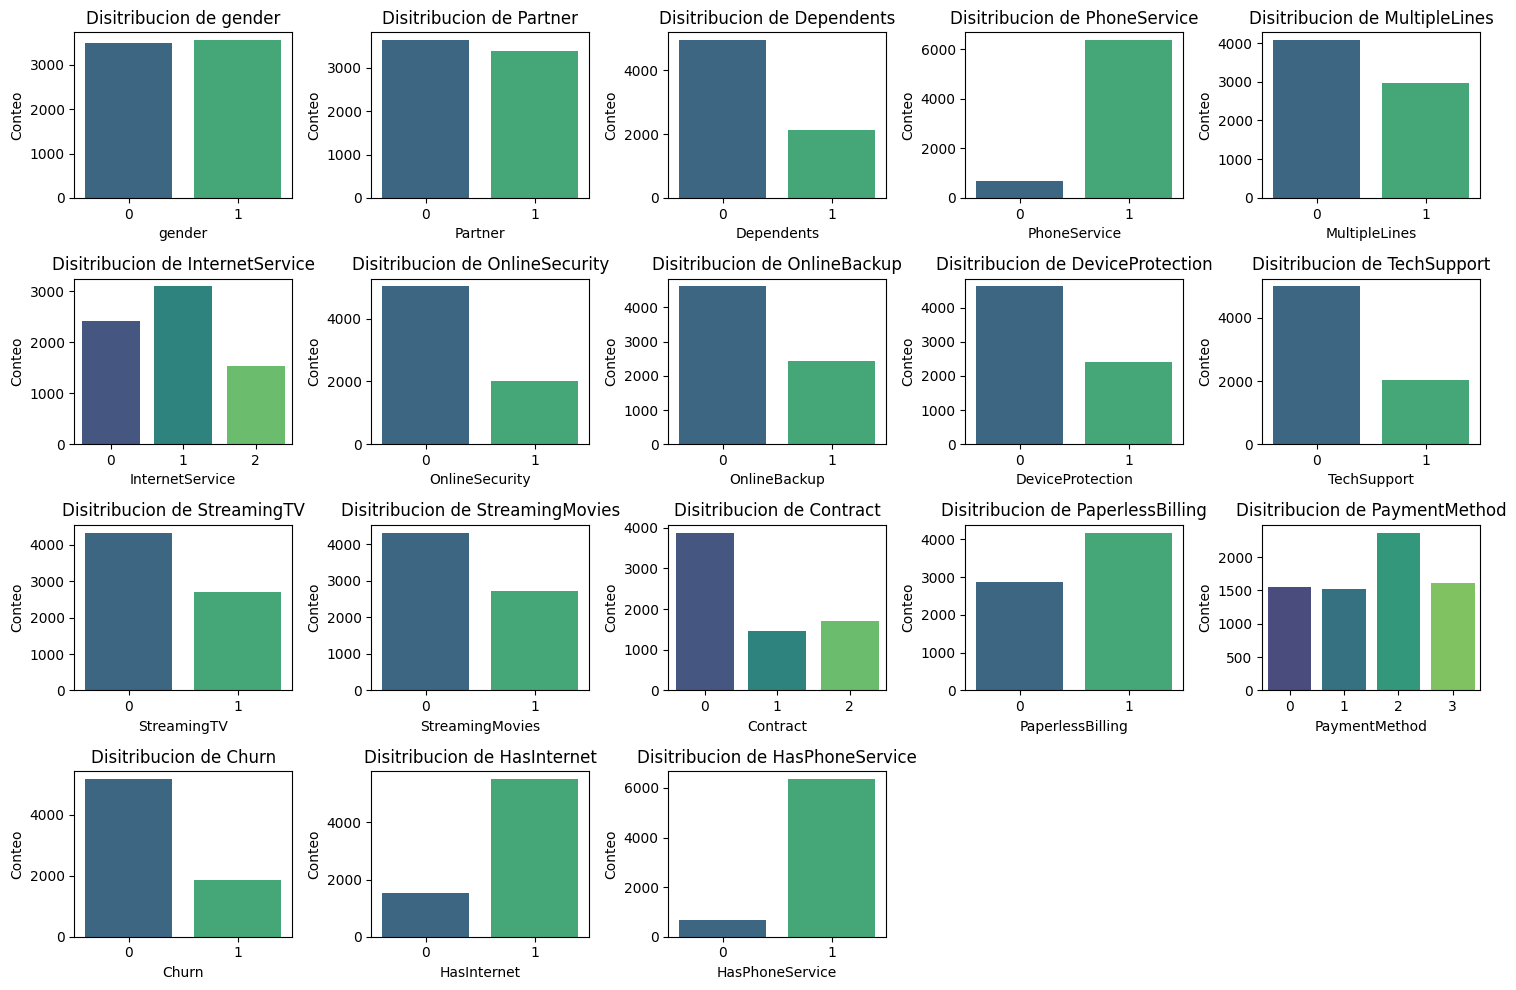

In [75]:
# Lista de variables categoricas
#cat_vars = ['gender', 'InternetService', 'Contract', 'PaymentMethod', 'Churn']

cat_vars = ['gender', 'Partner', 'Dependents', 'PhoneService',
                     'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                     'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'HasInternet',
                     'HasPhoneService']

# Configurar la visualizacion
plt.figure(figsize=(15,10))

# Graficar cada variable
for i, var in enumerate(cat_vars, 1):
    plt.subplot(4,5,i)
    sns.countplot(x = var, data = df1, palette = 'viridis')
    plt.title(f'Disitribucion de {var}')
    plt.xlabel(var)
    plt.ylabel('Conteo')
    
plt.tight_layout()
plt.show()

# 3. Modelo predictivo

En este caso se usa la variable Churn (desercion de clientes) El objetivo es descubrir qué factores influyen en la deserción o retención de los clientes.

¿Se puede usar otra variable como dependiente?

- Sí, puedes usar otra variable como dependiente, dependiendo de lo que quieras predecir. Por ejemplo:

- Si quisieras predecir el tipo de contrato de un cliente, podrías usar Contract como la variable dependiente.
Si quisieras predecir el método de pago de los clientes, podrías usar PaymentMethod como la variable dependiente.

In [83]:
# Definir las variables predictoras y la variable objetivo
X = df1.drop(columns='Churn')  # Variables predictoras
y = df1['Churn']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Opciones de balanceo
balance_methods = {
    'Original': (X_train, y_train),
    'SMOTE': SMOTE(random_state=42).fit_resample(X_train, y_train),
    'Undersampling': RandomUnderSampler(random_state=42).fit_resample(X_train, y_train)
}

# Configurar modelos individuales y ensemble
modelos = {
    'Regresion Logistica': LogisticRegression(max_iter=500, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Ensemble (LogReg + RandomForest)': VotingClassifier(
        estimators=[
            ('Logistic Regression', LogisticRegression(max_iter=500, random_state=42)),
            ('Random Forest', RandomForestClassifier(random_state=42))
        ],
        voting='soft'
    )
}

# Lista para almacenar los resultados
resultados = []

# Iterar sobre cada método de balanceo
for balance_name, (X_bal, y_bal) in balance_methods.items():
    print(f'\n### Balanceo con: {balance_name} ###')
    print(f'Distribución de clases después de {balance_name}: {Counter(y_bal)}')

    # Iterar sobre cada modelo y entrenarlo
    for nombre, modelo in modelos.items():
        print(f'\nEntrenando y evaluando {nombre} usando {balance_name}')
        
        # Entrenar el modelo
        modelo.fit(X_bal, y_bal)
        
        # Predecir sobre el conjunto de prueba
        y_pred = modelo.predict(X_test)

        # Evaluar el rendimiento del modelo
        accuracy = accuracy_score(y_test, y_pred)
        clas_report = classification_report(y_test, y_pred, output_dict=True)

        # Almacenar resultados relevantes
        resultados.append({
            'Balanceo': balance_name,
            'Modelo': nombre,
            'Accuracy': accuracy,
            'Precision Clase 1': clas_report['1']['precision'],
            'Recall Clase 1': clas_report['1']['recall'],
            'F1-Score Clase 1': clas_report['1']['f1-score']
        })


### Balanceo con: Original ###
Distribución de clases después de Original: Counter({0: 3635, 1: 1295})

Entrenando y evaluando Regresion Logistica usando Original

Entrenando y evaluando Random Forest usando Original


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Entrenando y evaluando SVM usando Original


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.


Entrenando y evaluando XGBoost usando Original

Entrenando y evaluando Ensemble (LogReg + RandomForest) usando Original


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### Balanceo con: SMOTE ###
Distribución de clases después de SMOTE: Counter({0: 3635, 1: 3635})

Entrenando y evaluando Regresion Logistica usando SMOTE


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Entrenando y evaluando Random Forest usando SMOTE

Entrenando y evaluando SVM usando SMOTE

Entrenando y evaluando XGBoost usando SMOTE

Entrenando y evaluando Ensemble (LogReg + RandomForest) usando SMOTE


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:45:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



### Balanceo con: Undersampling ###
Distribución de clases después de Undersampling: Counter({0: 1295, 1: 1295})

Entrenando y evaluando Regresion Logistica usando Undersampling

Entrenando y evaluando Random Forest usando Undersampling


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Entrenando y evaluando SVM usando Undersampling

Entrenando y evaluando XGBoost usando Undersampling

Entrenando y evaluando Ensemble (LogReg + RandomForest) usando Undersampling


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:45:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Si buscas priorizar la precisión en la detección de churn, el conjunto SMOTE es una buena opción, ya que proporciona un balance entre sensibilidad y precisión.
Si tu objetivo es maximizar la detección de churn y no te preocupa tanto la precisión (por ejemplo, para reducir el riesgo de perder clientes), el conjunto Undersampling con un recall alto podría ser el adecuado.

In [84]:
# Convertir resultados a un DataFrame para visualización
results_df = pd.DataFrame(resultados)
print("\n### Resultados del Ensemble ###")
print(results_df)


### Resultados del Ensemble ###
         Balanceo                            Modelo  Accuracy  \
0        Original               Regresion Logistica  0.810222   
1        Original                     Random Forest  0.799337   
2        Original                               SVM  0.728348   
3        Original                           XGBoost  0.792712   
4        Original  Ensemble (LogReg + RandomForest)  0.807856   
5           SMOTE               Regresion Logistica  0.765263   
6           SMOTE                     Random Forest  0.772362   
7           SMOTE                               SVM  0.680549   
8           SMOTE                           XGBoost  0.767156   
9           SMOTE  Ensemble (LogReg + RandomForest)  0.781827   
10  Undersampling               Regresion Logistica  0.746805   
11  Undersampling                     Random Forest  0.747279   
12  Undersampling                               SVM  0.665405   
13  Undersampling                           XGBoost  0.72

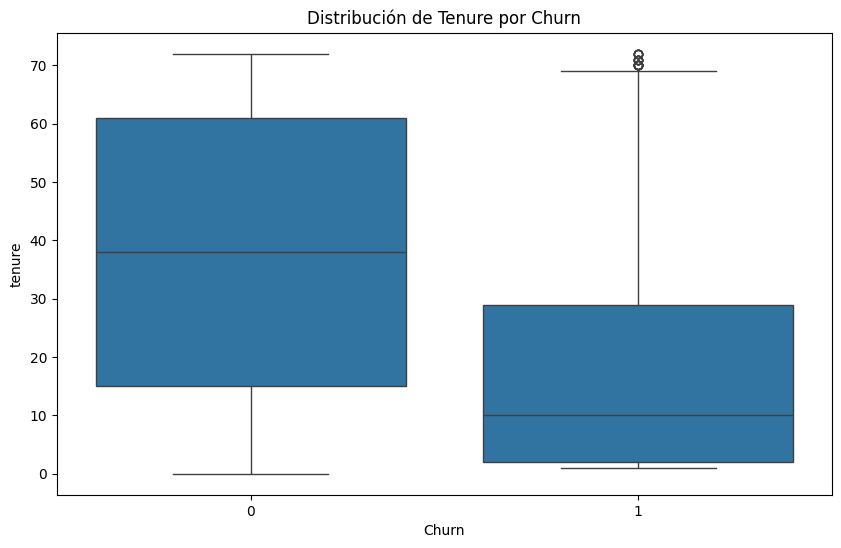

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot para Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='Churn', y='tenure')
plt.title('Distribución de Tenure por Churn')
plt.show()



### Balanceo con: Original ###
Distribución de clases después de Original: Counter({0: 3635, 1: 1295})

Entrenando y evaluando Regresion Logistica usando Original


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


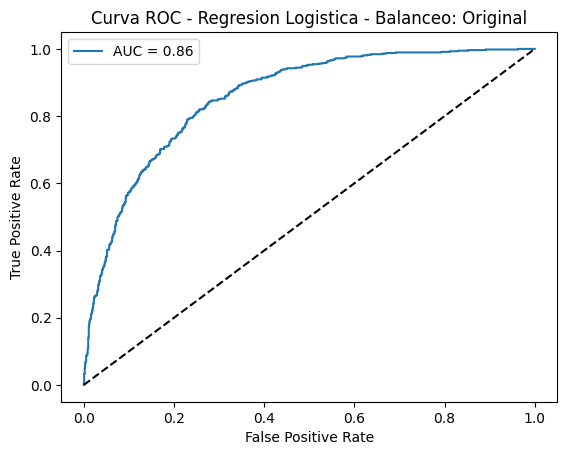

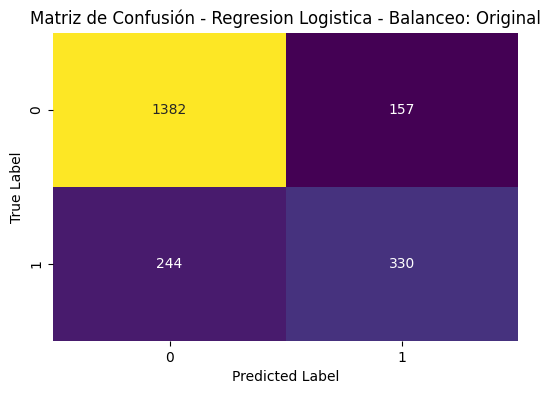

Accuracy: 0.81
Precision (Clase 1): 0.68
Recall (Clase 1): 0.57
F1-Score (Clase 1): 0.62

Entrenando y evaluando Random Forest usando Original


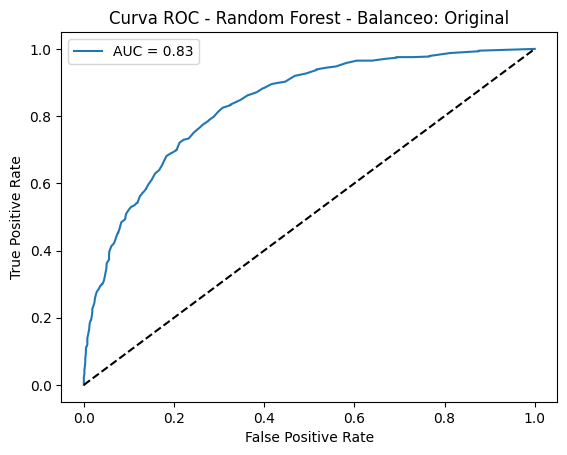

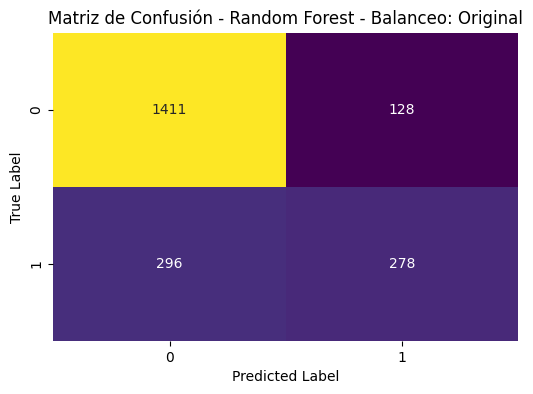

Accuracy: 0.80
Precision (Clase 1): 0.68
Recall (Clase 1): 0.48
F1-Score (Clase 1): 0.57

Entrenando y evaluando SVM usando Original


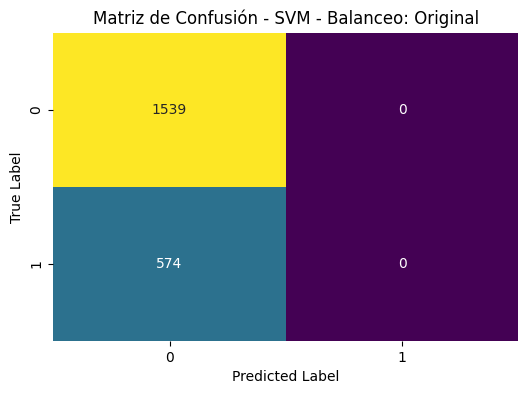

Accuracy: 0.73
Precision (Clase 1): 0.00
Recall (Clase 1): 0.00
F1-Score (Clase 1): 0.00

Entrenando y evaluando XGBoost usando Original


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

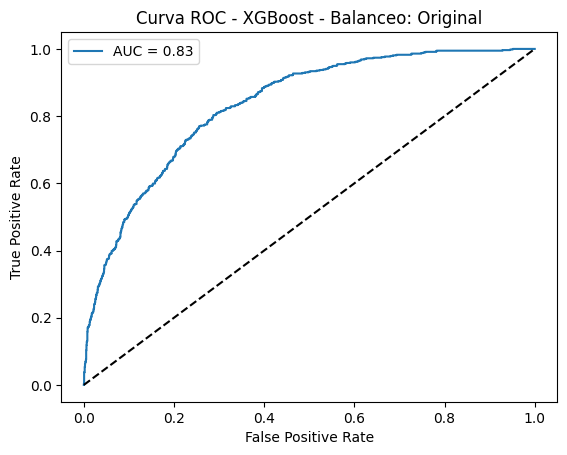

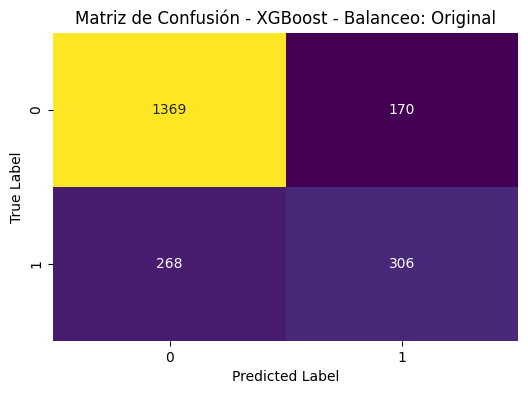

Accuracy: 0.79
Precision (Clase 1): 0.64
Recall (Clase 1): 0.53
F1-Score (Clase 1): 0.58

Entrenando y evaluando Ensemble (LogReg + RandomForest) usando Original


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


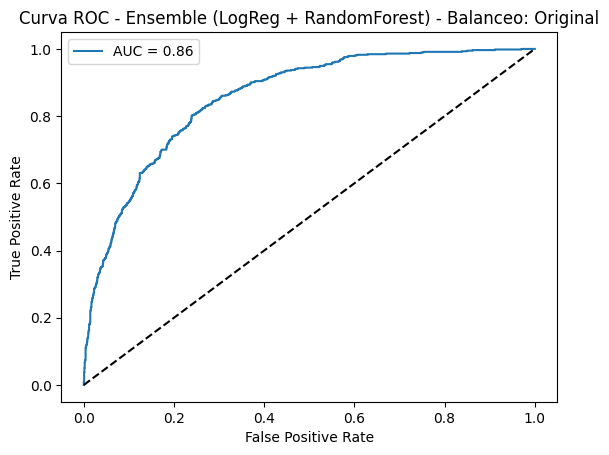

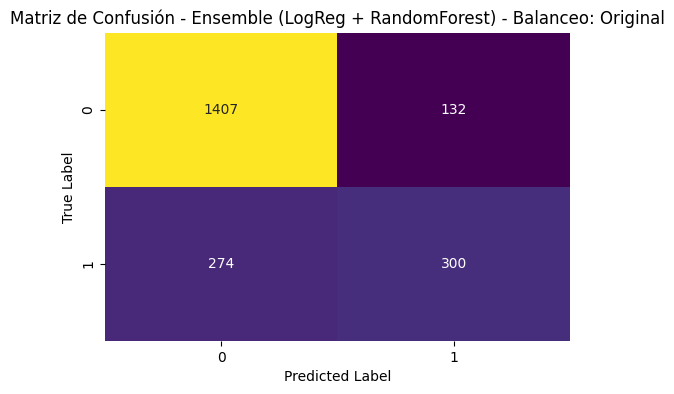

Accuracy: 0.81
Precision (Clase 1): 0.69
Recall (Clase 1): 0.52
F1-Score (Clase 1): 0.60

### Balanceo con: SMOTE ###
Distribución de clases después de SMOTE: Counter({0: 3635, 1: 3635})

Entrenando y evaluando Regresion Logistica usando SMOTE


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


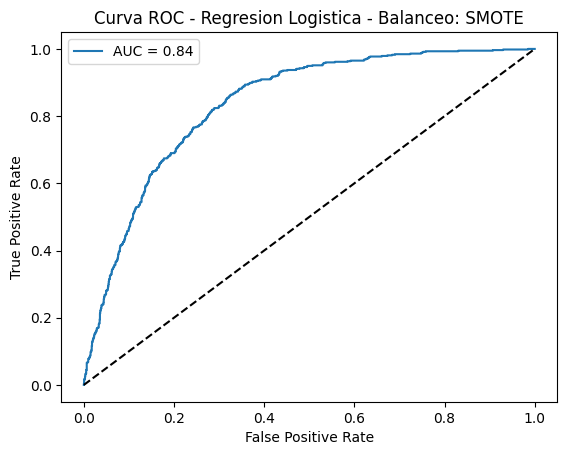

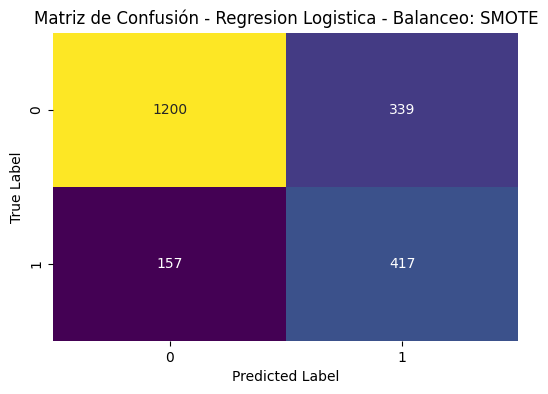

Accuracy: 0.77
Precision (Clase 1): 0.55
Recall (Clase 1): 0.73
F1-Score (Clase 1): 0.63

Entrenando y evaluando Random Forest usando SMOTE


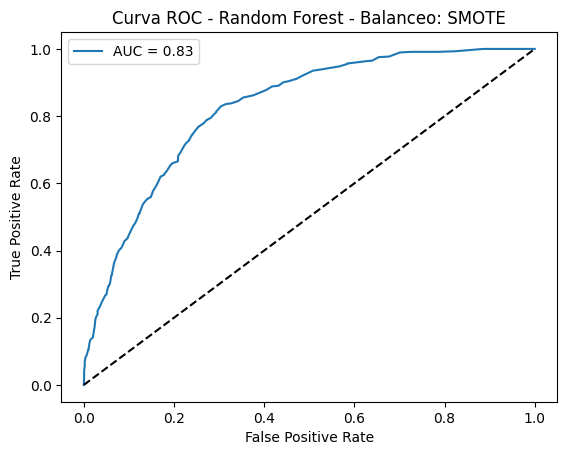

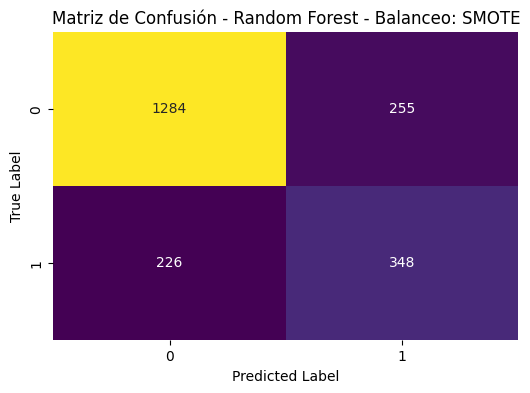

Accuracy: 0.77
Precision (Clase 1): 0.58
Recall (Clase 1): 0.61
F1-Score (Clase 1): 0.59

Entrenando y evaluando SVM usando SMOTE


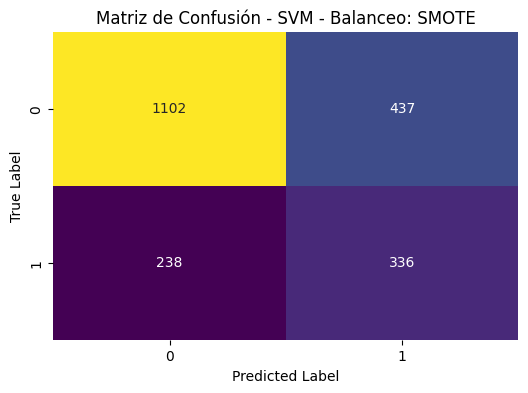

Accuracy: 0.68
Precision (Clase 1): 0.43
Recall (Clase 1): 0.59
F1-Score (Clase 1): 0.50

Entrenando y evaluando XGBoost usando SMOTE


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:54:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


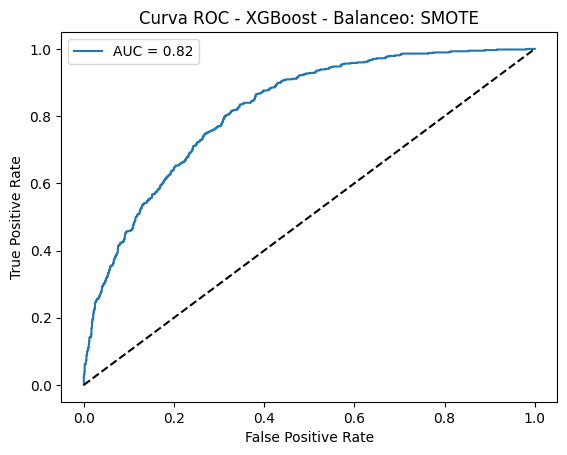

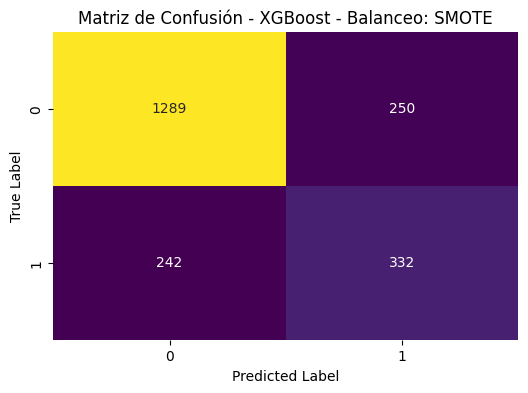

Accuracy: 0.77
Precision (Clase 1): 0.57
Recall (Clase 1): 0.58
F1-Score (Clase 1): 0.57

Entrenando y evaluando Ensemble (LogReg + RandomForest) usando SMOTE


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


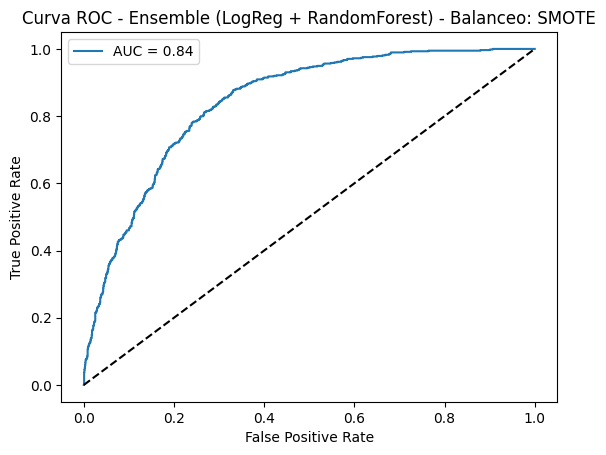

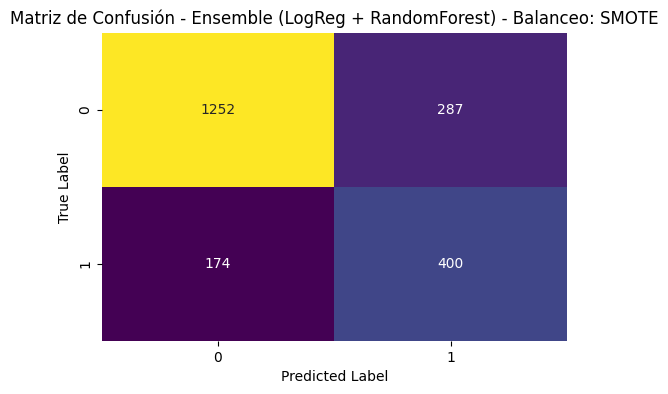

Accuracy: 0.78
Precision (Clase 1): 0.58
Recall (Clase 1): 0.70
F1-Score (Clase 1): 0.63

### Balanceo con: Undersampling ###
Distribución de clases después de Undersampling: Counter({0: 1295, 1: 1295})

Entrenando y evaluando Regresion Logistica usando Undersampling


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


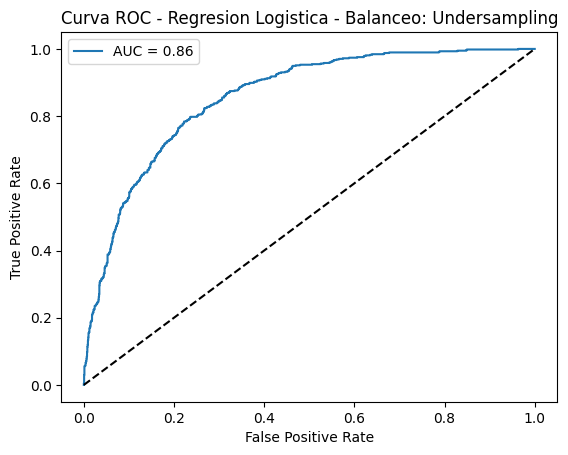

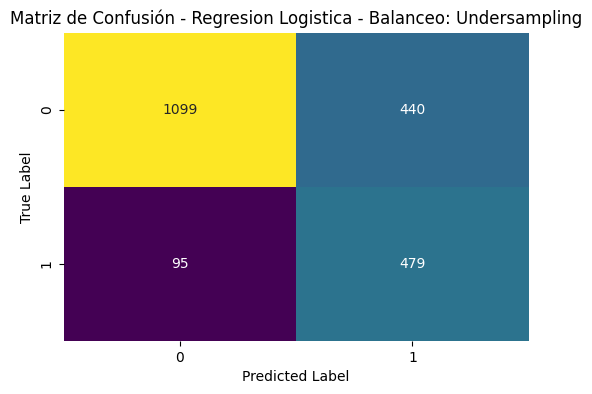

Accuracy: 0.75
Precision (Clase 1): 0.52
Recall (Clase 1): 0.83
F1-Score (Clase 1): 0.64

Entrenando y evaluando Random Forest usando Undersampling


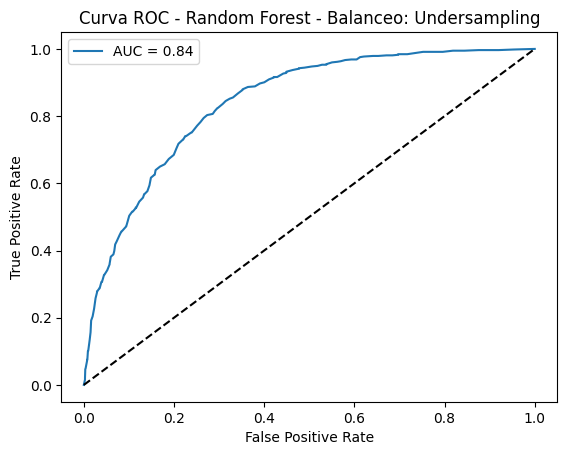

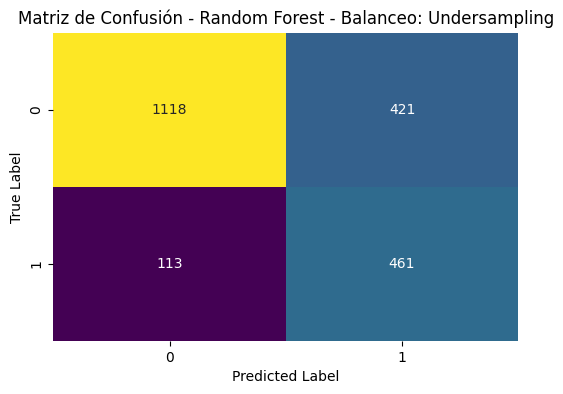

Accuracy: 0.75
Precision (Clase 1): 0.52
Recall (Clase 1): 0.80
F1-Score (Clase 1): 0.63

Entrenando y evaluando SVM usando Undersampling


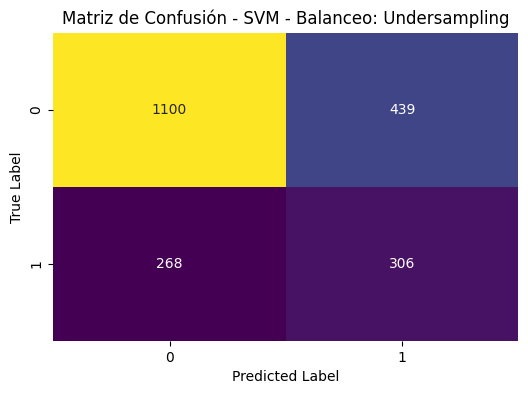

Accuracy: 0.67
Precision (Clase 1): 0.41
Recall (Clase 1): 0.53
F1-Score (Clase 1): 0.46

Entrenando y evaluando XGBoost usando Undersampling


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [21:54:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


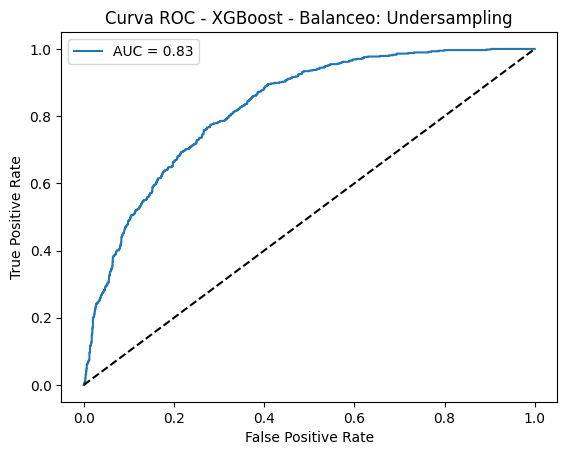

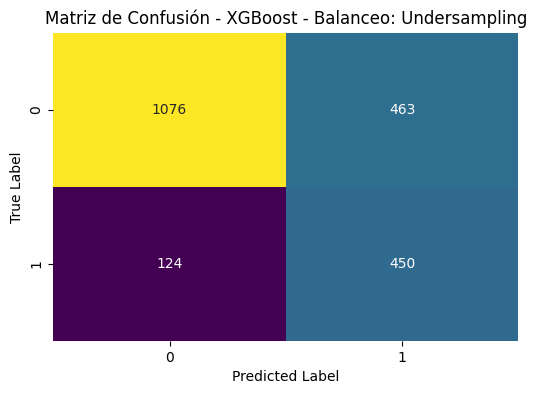

Accuracy: 0.72
Precision (Clase 1): 0.49
Recall (Clase 1): 0.78
F1-Score (Clase 1): 0.61

Entrenando y evaluando Ensemble (LogReg + RandomForest) usando Undersampling


/home/sebas/Proyectos_Data/P1/P1_venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


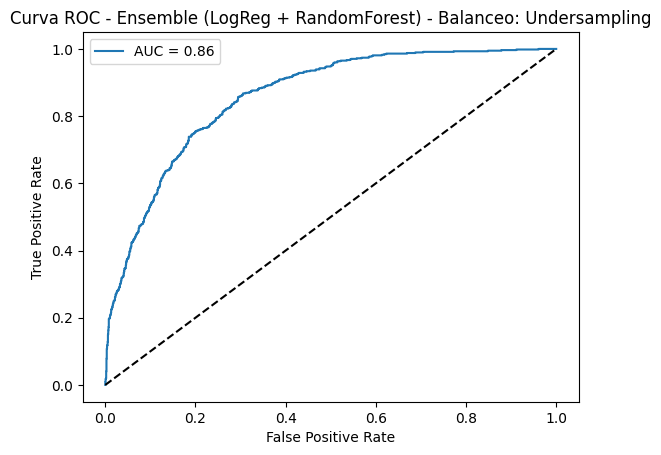

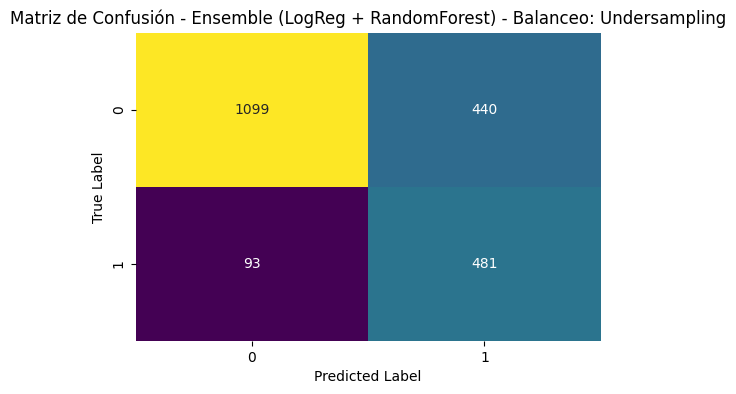

Accuracy: 0.75
Precision (Clase 1): 0.52
Recall (Clase 1): 0.84
F1-Score (Clase 1): 0.64


In [88]:
# Iterar sobre cada método de balanceo
for balance_name, (X_bal, y_bal) in balance_methods.items():
    print(f'\n### Balanceo con: {balance_name} ###')
    print(f'Distribución de clases después de {balance_name}: {Counter(y_bal)}')

    # Iterar sobre cada modelo y entrenarlo
    for nombre, modelo in modelos.items():
        print(f'\nEntrenando y evaluando {nombre} usando {balance_name}')
        
        # Entrenar el modelo
        modelo.fit(X_bal, y_bal)
        
        # Predecir las probabilidades sobre el conjunto de prueba (para ROC)
        if hasattr(modelo, "predict_proba"):
            y_pred_proba = modelo.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
            
            # Calcular AUC y graficar la curva ROC
            plt.figure()
            plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba):.2f}')
            plt.plot([0, 1], [0, 1], 'k--')
            plt.xlabel('False Positive Rate')
            plt.ylabel('True Positive Rate')
            plt.title(f'Curva ROC - {nombre} - Balanceo: {balance_name}')
            plt.legend()
            plt.show()
        
        # Predecir etiquetas para la matriz de confusión
        y_pred = modelo.predict(X_test)
        
        # Calcular y mostrar la matriz de confusión como un mapa de calor
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm, annot=True, fmt="d", cmap="viridis", cbar=False)
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {nombre} - Balanceo: {balance_name}')
        plt.show()

        # Evaluar el rendimiento del modelo
        accuracy = accuracy_score(y_test, y_pred)
        clas_report = classification_report(y_test, y_pred, output_dict=True)

        # Mostrar métricas adicionales
        print(f"Accuracy: {accuracy:.2f}")
        print(f"Precision (Clase 1): {clas_report['1']['precision']:.2f}")
        print(f"Recall (Clase 1): {clas_report['1']['recall']:.2f}")
        print(f"F1-Score (Clase 1): {clas_report['1']['f1-score']:.2f}")